# Clustering Assignment


## Importing All Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

import warnings
warnings.filterwarnings('ignore')

from matplotlib.pyplot import xticks
%matplotlib inline

In [2]:
data=pd.read_csv('Country-data.csv')
data.head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
data.shape

(167, 10)

In [4]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In the given data columns exports, health and imports are given in % so, we need to convert them back to normal values



In [7]:
data['exports']= (data['exports']*data['gdpp'])/100
data['health']= (data['health']*data['gdpp'])/100
data['imports']= (data['imports']*data['gdpp'])/100

## Exploratory Data Analytics

We need to choose the countries that are in the direst need of aid. Hence, we need to identify those countries with using some socio-economic and health factors that determine the overall development of the country

We will have a look on the lowest 10 countries for each factor.

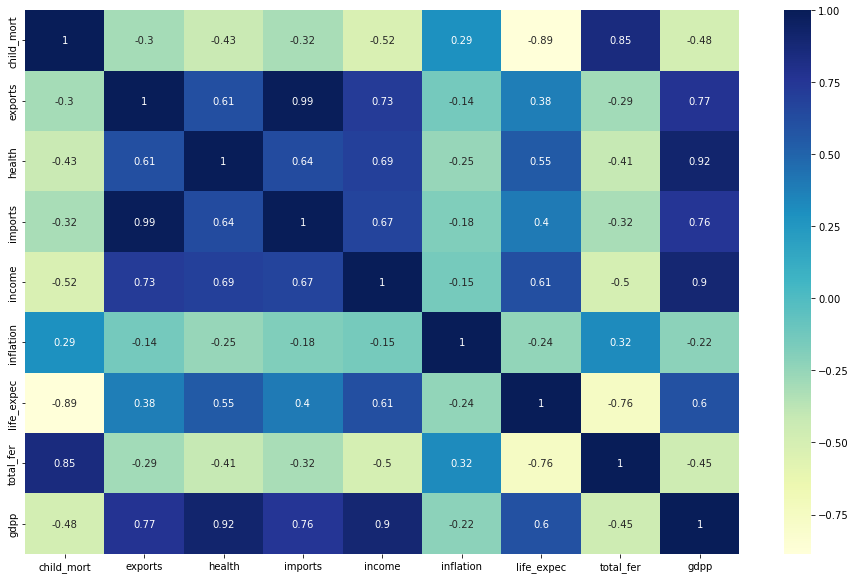

In [8]:
plt.figure(figsize = (16, 10))
sns.heatmap(data.corr(), annot = True, cmap="YlGnBu")
plt.savefig('corrplot')
plt.show()

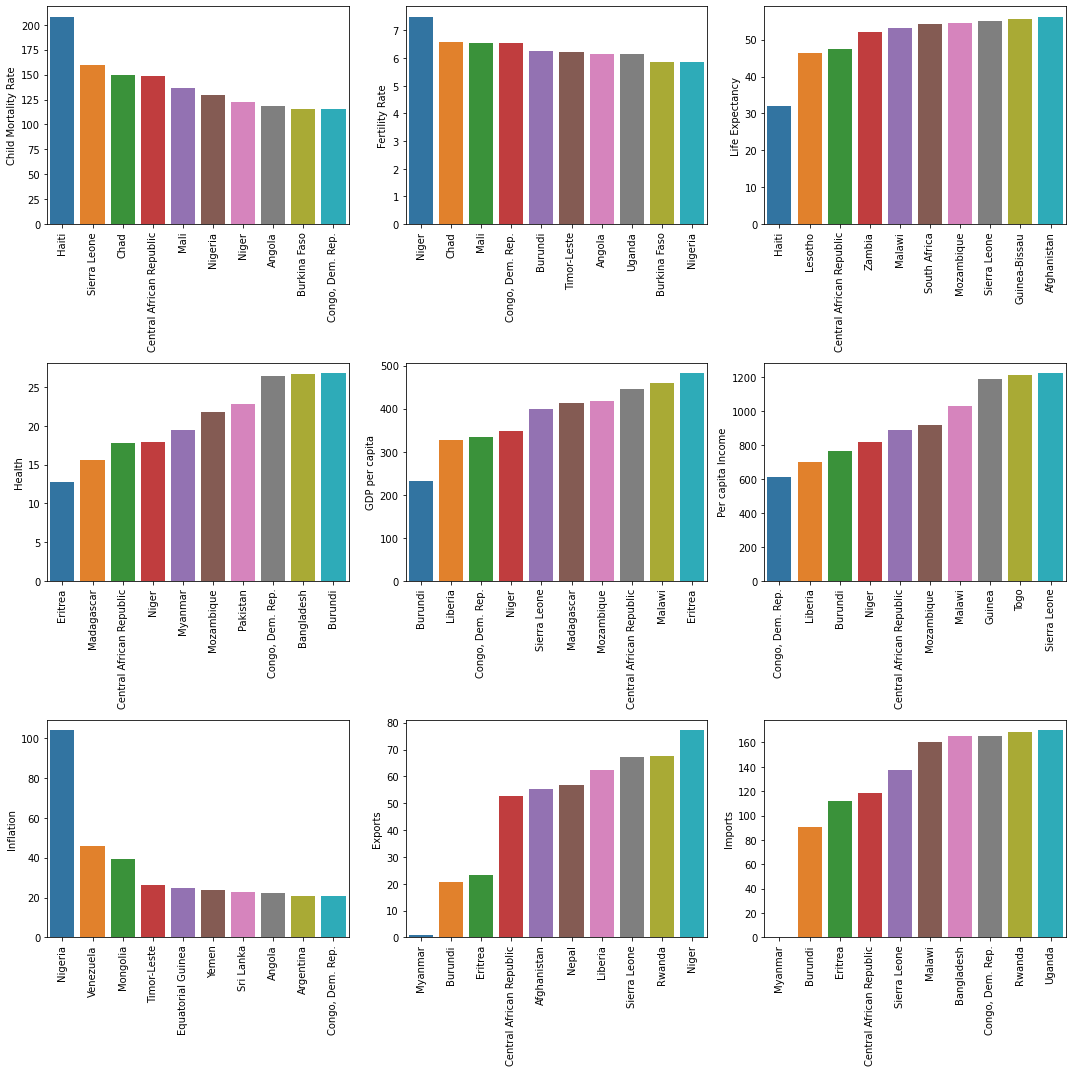

In [9]:
fig, axs = plt.subplots(3,3,figsize = (15,15))

# Child Mortality Rate : Death of children under 5 years of age per 1000 live births

top10_child_mort = data[['country','child_mort']].sort_values('child_mort', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='child_mort', data= top10_child_mort, ax = axs[0,0])
plt1.set(xlabel = '', ylabel= 'Child Mortality Rate')

# Fertility Rate: The number of children that would be born to each woman if the current age-fertility rates remain the same
top10_total_fer = data[['country','total_fer']].sort_values('total_fer', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='total_fer', data= top10_total_fer, ax = axs[0,1])
plt1.set(xlabel = '', ylabel= 'Fertility Rate')

# Life Expectancy: The average number of years a new born child would live if the current mortality patterns are to remain same

bottom10_life_expec = data[['country','life_expec']].sort_values('life_expec', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='life_expec', data= bottom10_life_expec, ax = axs[0,2])
plt1.set(xlabel = '', ylabel= 'Life Expectancy')

# Health :Total health spending as %age of Total GDP.

bottom10_health = data[['country','health']].sort_values('health', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='health', data= bottom10_health, ax = axs[1,0])
plt1.set(xlabel = '', ylabel= 'Health')

# The GDP per capita : Calculated as the Total GDP divided by the total population.

bottom10_gdpp = data[['country','gdpp']].sort_values('gdpp', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='gdpp', data= bottom10_gdpp, ax = axs[1,1])
plt1.set(xlabel = '', ylabel= 'GDP per capita')

# Per capita Income : Net income per person

bottom10_income = data[['country','income']].sort_values('income', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='income', data= bottom10_income, ax = axs[1,2])
plt1.set(xlabel = '', ylabel= 'Per capita Income')


# Inflation: The measurement of the annual growth rate of the Total GDP

top10_inflation = data[['country','inflation']].sort_values('inflation', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='inflation', data= top10_inflation, ax = axs[2,0])
plt1.set(xlabel = '', ylabel= 'Inflation')


# Exports: Exports of goods and services. Given as %age of the Total GDP

bottom10_exports = data[['country','exports']].sort_values('exports', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='exports', data= bottom10_exports, ax = axs[2,1])
plt1.set(xlabel = '', ylabel= 'Exports')


# Imports: Imports of goods and services. Given as %age of the Total GDP

bottom10_imports = data[['country','imports']].sort_values('imports', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='imports', data= bottom10_imports, ax = axs[2,2])
plt1.set(xlabel = '', ylabel= 'Imports')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation = 90)
    
plt.tight_layout()
plt.savefig('eda')
plt.show()

In [10]:
columns= ['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']


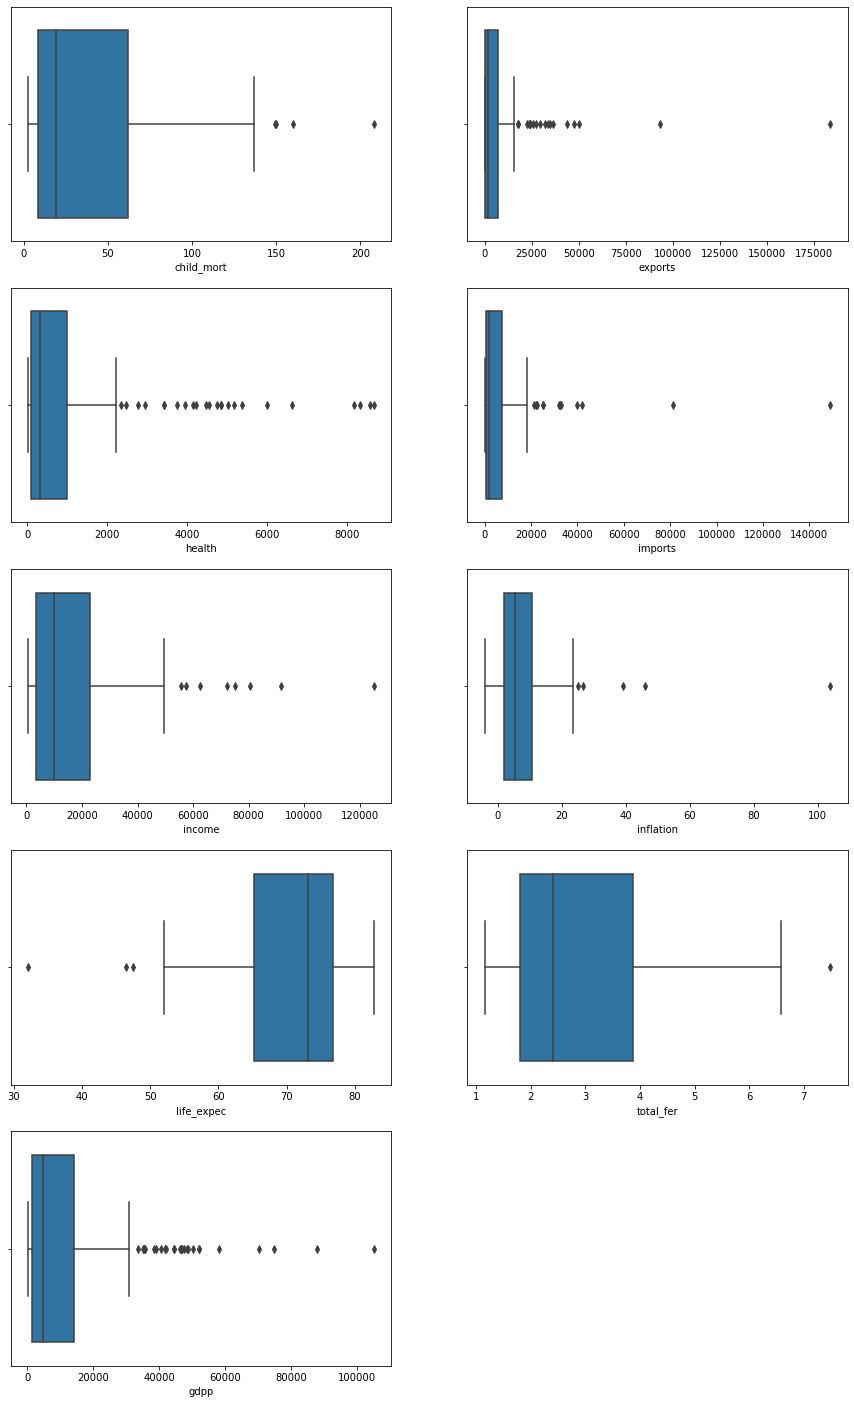

In [11]:
plt.figure(figsize=(15,25))
for i in enumerate(columns):
    ax = plt.subplot(5, 2, i[0]+1)
    sns.boxplot(data[i[1]])
plt.show()

In [12]:
for i in enumerate(columns):
    percentiles = data[i[1]].quantile([0.05,0.95]).values
    data[i[1]][data[i[1]] <= percentiles[0]] = percentiles[0]
    data[i[1]][data[i[1]] >= percentiles[1]] = percentiles[1]

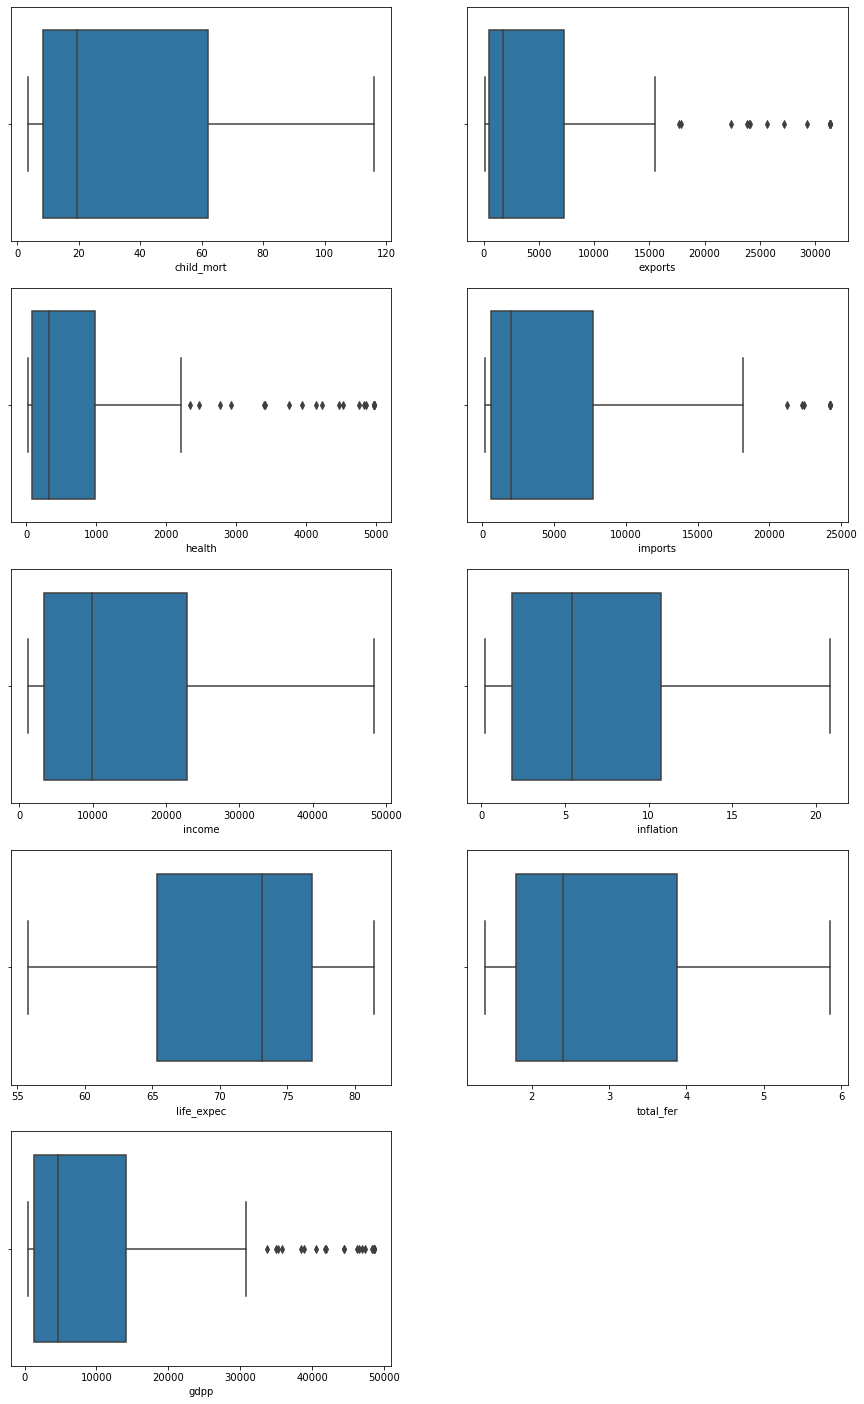

In [13]:
plt.figure(figsize=(15,25))
for i in enumerate(columns):
    ax = plt.subplot(5, 2, i[0]+1)
    sns.boxplot(data[i[1]])
plt.show()

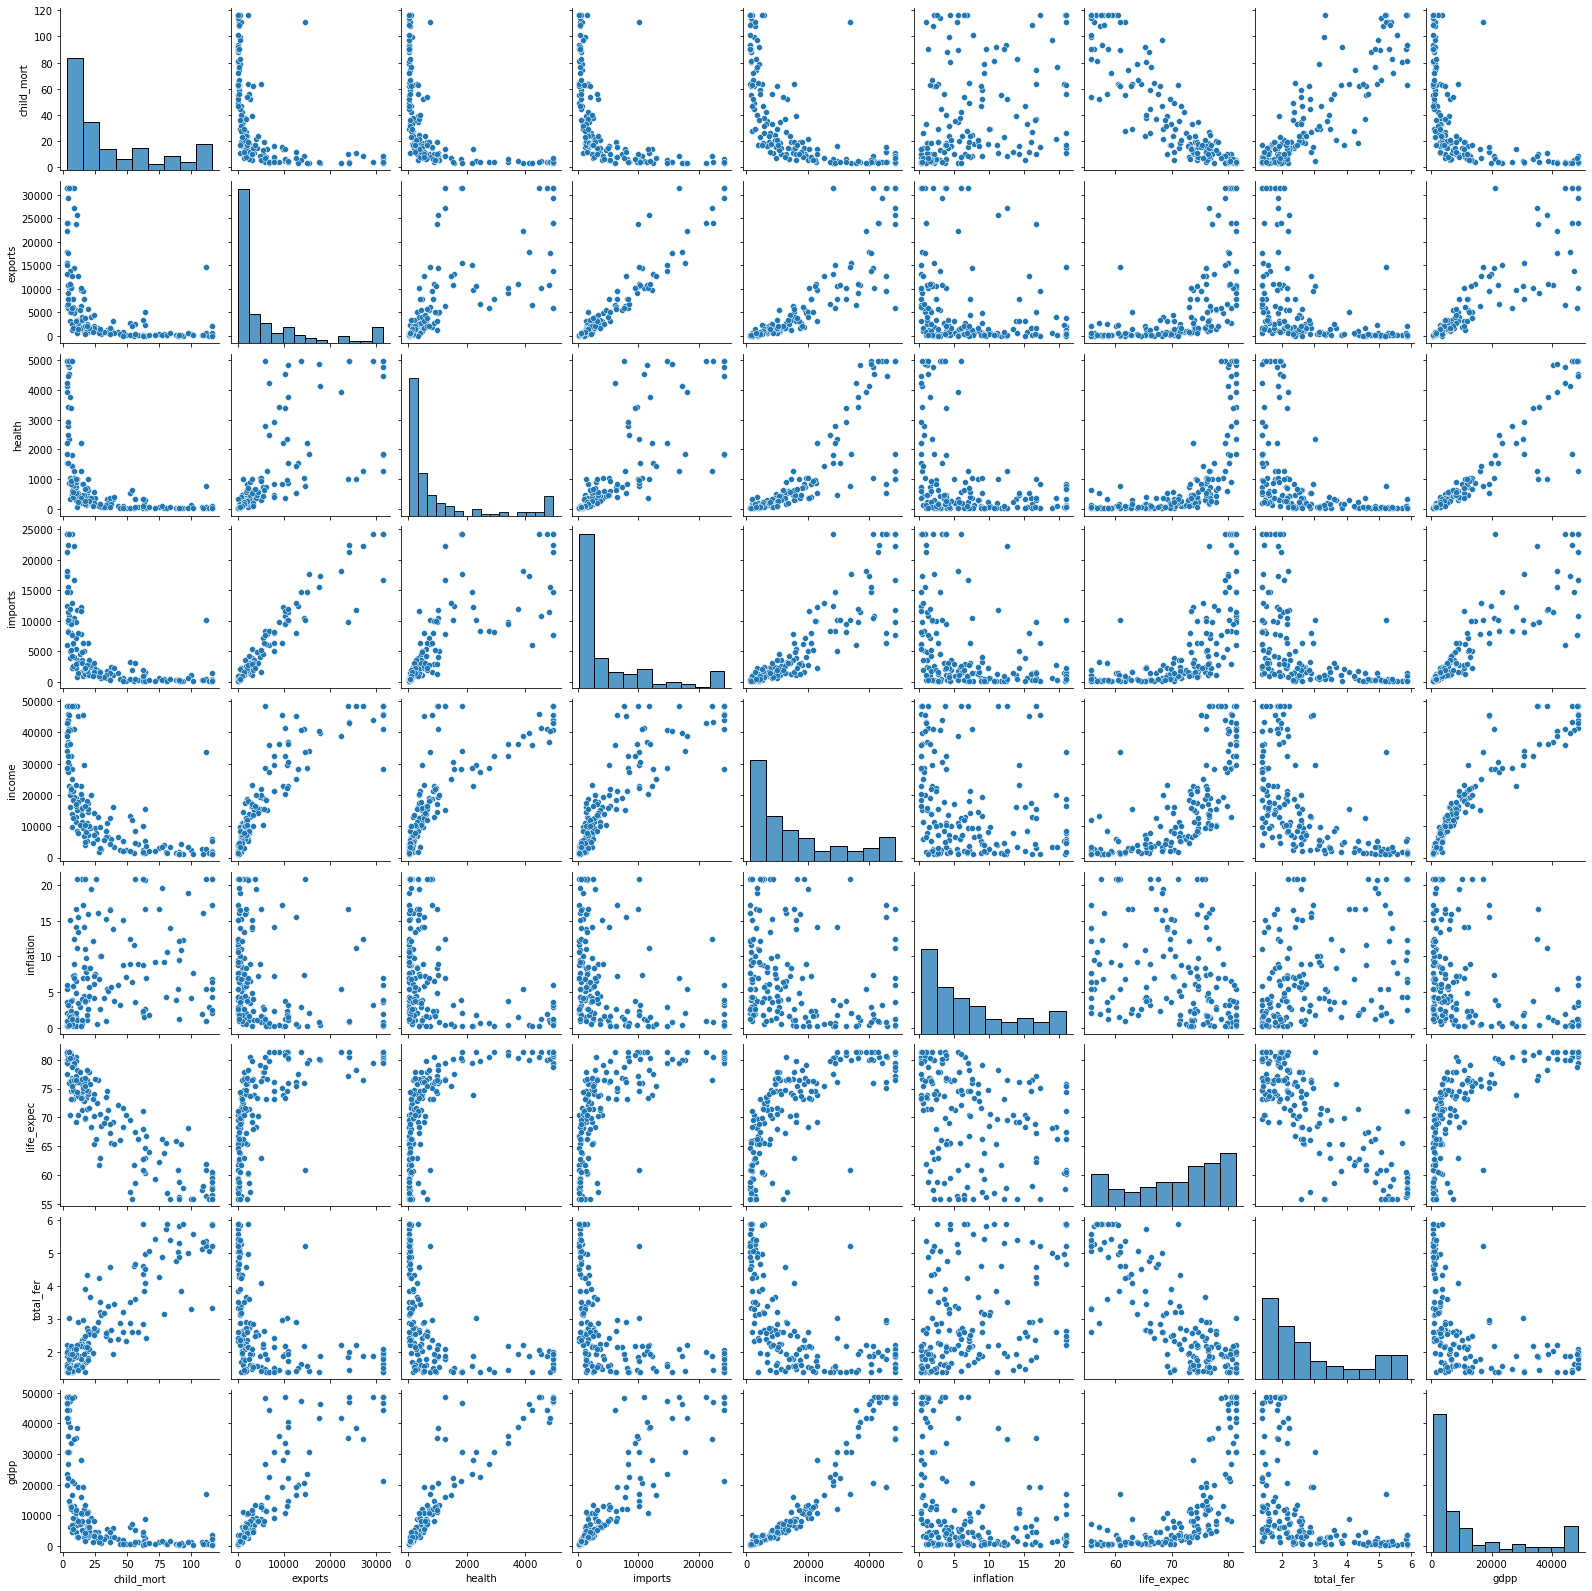

In [14]:
sns.pairplot(data)
plt.show()

In [15]:
data.corr()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.480031,-0.500800,-0.539389,-0.637594,0.325082,-0.890201,0.892782,-0.557912
exports,-0.480031,1.000000,0.763772,0.967762,0.881110,-0.248510,0.582728,-0.440643,0.880736
health,-0.500800,0.763772,1.000000,0.834689,0.821681,-0.392093,0.627544,-0.459678,0.936717
imports,-0.539389,0.967762,0.834689,1.000000,0.878580,-0.361760,0.636451,-0.502098,0.901729
income,-0.637594,0.881110,0.821681,0.878580,1.000000,-0.234853,0.729253,-0.590654,0.941514
inflation,0.325082,-0.248510,-0.392093,-0.361760,-0.234853,1.000000,-0.336551,0.368325,-0.332902
life_expec,-0.890201,0.582728,0.627544,0.636451,0.729253,-0.336551,1.000000,-0.821065,0.681829
total_fer,0.892782,-0.440643,-0.459678,-0.502098,-0.590654,0.368325,-0.821065,1.000000,-0.508362
gdpp,-0.557912,0.880736,0.936717,0.901729,0.941514,-0.332902,0.681829,-0.508362,1.000000


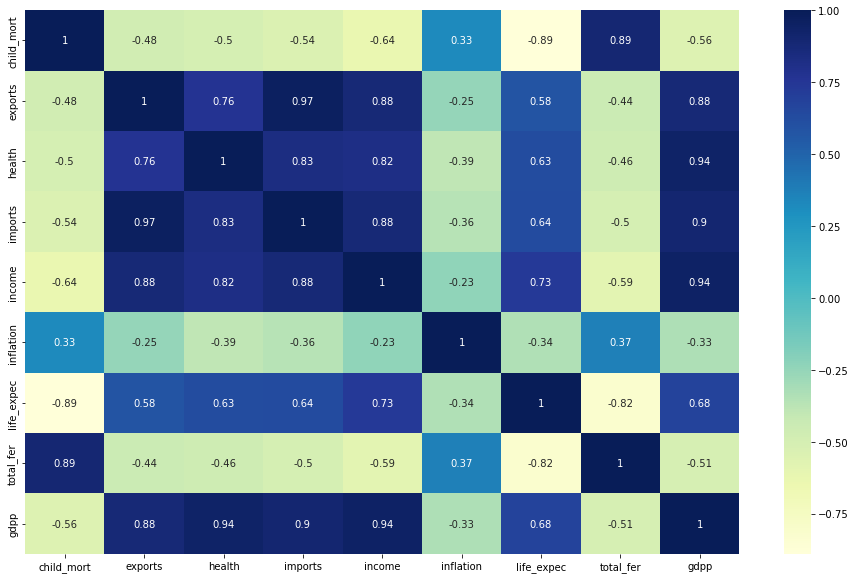

In [16]:
plt.figure(figsize = (16, 10))
sns.heatmap(data.corr(), annot = True, cmap="YlGnBu")
plt.savefig('corrplot')
plt.show()

## Hokins test

In [17]:
def hopkins(X):
    d = X.shape[1]
    n = len(X)
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    HS = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(HS):
        print(ujd, wjd)
        HS = 0
 
    return HS

In [18]:
hopkins(data.drop('country',axis=1))

0.9066148477062875

## Scaling the data for clustering

The data looks good for the clustering.

In [19]:
df1=data.drop('country',axis=1)
SS=StandardScaler()
df1=SS.fit_transform(df1)

## KMeans clustering

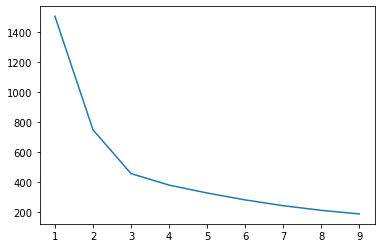

In [20]:
# Finding Optimal number of clusters.
# Elbow Curve
ssd = []
for k in list(range(1,10)):
    model = KMeans(n_clusters = k, max_iter = 50).fit(df1)
    ssd.append([k, model.inertia_])
    
plt.plot(pd.DataFrame(ssd)[0], pd.DataFrame(ssd)[1]);

In [21]:
# Silhouette score analysis to find the ideal number of clusters for K-means clustering
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
print("silhouette score")
for num_clusters in range_n_clusters:    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50,random_state= 100)
    kmeans.fit(df1)
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df1, cluster_labels)
    
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

silhouette score
For n_clusters=2, the silhouette score is 0.48447902987180524
For n_clusters=3, the silhouette score is 0.4203919640787207
For n_clusters=4, the silhouette score is 0.3832442500525417
For n_clusters=5, the silhouette score is 0.2994963024128736
For n_clusters=6, the silhouette score is 0.30307244388683313
For n_clusters=7, the silhouette score is 0.3301983269977132
For n_clusters=8, the silhouette score is 0.3432577893986418


Optimal number of k is 4. #according to the silhoutte score.

In [22]:
kmeans = KMeans(n_clusters=4, max_iter=100 , random_state = 100)
kmeans.fit(df1)

KMeans(max_iter=100, n_clusters=4, random_state=100)

In [23]:
kmeans.labels_

array([2, 0, 0, 2, 0, 0, 0, 3, 1, 0, 3, 3, 0, 3, 0, 1, 0, 2, 0, 0, 0, 2,
       0, 3, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 3, 3,
       1, 0, 0, 0, 0, 2, 2, 3, 0, 1, 3, 2, 2, 0, 1, 2, 3, 0, 0, 2, 2, 0,
       2, 3, 1, 0, 0, 0, 2, 1, 3, 3, 0, 3, 0, 0, 2, 2, 3, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 3, 2, 2, 1, 3, 2, 0, 0, 0, 0, 0, 3, 1, 0, 0, 2, 0, 3, 2, 0, 3,
       2, 1, 3, 3, 2, 2, 3, 3, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 3, 3, 0, 0, 0, 0, 0, 2, 2])

In [24]:
df_km = pd.concat([data, pd.Series(kmeans.labels_)], axis = 1)
df_km.columns = ['country','child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp','cluster_id']
df_km.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,70.4688,41.9174,248.297,1610.0,9.44,56.2,5.820,553.0,2
1,Albania,16.6,1145.2000,267.8950,1987.740,9930.0,4.49,76.3,1.650,4090.0,0
2,Algeria,27.3,1712.6400,185.9820,1400.440,12900.0,16.10,76.5,2.890,4460.0,0
3,Angola,116.0,2199.1900,100.6050,1514.370,5900.0,20.87,60.1,5.861,3530.0,2
4,Antigua and Barbuda,10.3,5551.0000,735.6600,7185.800,19100.0,1.44,76.8,2.130,12200.0,0


In [25]:
df_km['cluster_id'].value_counts()

0    76
2    48
3    26
1    17
Name: cluster_id, dtype: int64

### KMeans cluster visualization

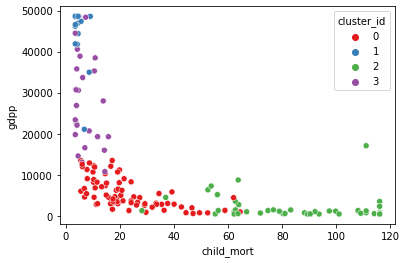

In [26]:
sns.scatterplot(x = 'child_mort', y = 'gdpp', hue ='cluster_id', legend = 'full', data = df_km, palette='Set1')
plt.show()

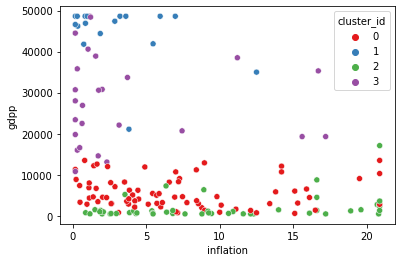

In [27]:
sns.scatterplot(x = 'inflation', y = 'gdpp', hue ='cluster_id', legend = 'full', data = df_km, palette='Set1')
plt.show()

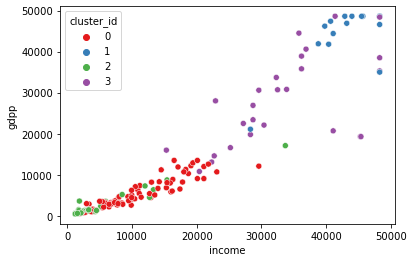

In [28]:
sns.scatterplot(x = 'income', y = 'gdpp', hue ='cluster_id', legend = 'full', data = df_km, palette='Set1')
plt.show()

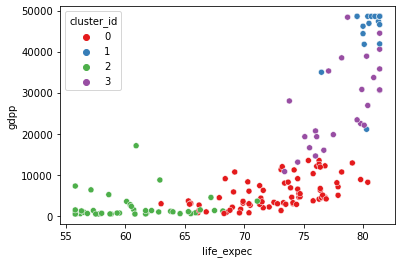

In [29]:
sns.scatterplot(x = 'life_expec', y = 'gdpp', hue ='cluster_id', legend = 'full', data = df_km, palette='Set1')
plt.show()

### Profiling for KMeans clusters.

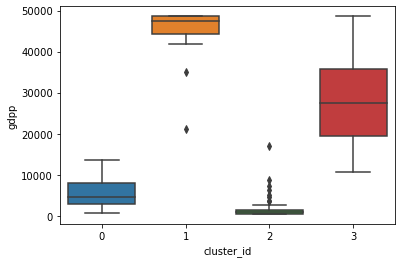

In [30]:
# Here we will be profiling for these 3 variables as mentioned in problem statement (gdpp, child_mort and income).
sns.boxplot(data=df_km,x = 'cluster_id',y='gdpp')
plt.show()

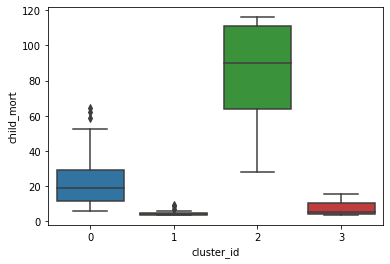

In [31]:
sns.boxplot(data=df_km,x = 'cluster_id',y='child_mort')
plt.show()

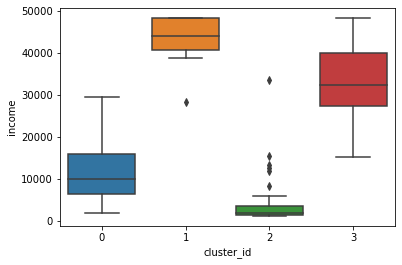

In [32]:
sns.boxplot(data=df_km,x = 'cluster_id',y='income')
plt.show()

Here cluster_id 2 has the lowest income and hightest child mortality rate with a very a very low gdpp so, this will be our concerned cluster.

In [33]:
#Finding the observations that belong to cluster id 2
df_km[df_km['cluster_id']==2]['country']

0                   Afghanistan
3                        Angola
17                        Benin
21                     Botswana
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
50                      Eritrea
55                        Gabon
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
72                         Iraq
80                        Kenya
81                     Kiribati
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
106     

In [34]:
top_kmeans = df_km[df_km['cluster_id']==2].sort_values(by=["child_mort","gdpp","income"], ascending=[False, True,True])
top_kmeans = top_kmeans.reset_index().drop('index',axis=1)
top_kmeans.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Central African Republic,116.0,70.4688,26.71592,169.281,1213.0,2.01,55.78,5.210,465.9,2
1,"Congo, Dem. Rep.",116.0,137.2740,26.71592,169.281,1213.0,20.80,57.50,5.861,465.9,2
2,Niger,116.0,77.2560,26.71592,170.868,1213.0,2.55,58.80,5.861,465.9,2
3,Sierra Leone,116.0,70.4688,52.26900,169.281,1220.0,17.20,55.78,5.200,465.9,2
4,Burkina Faso,116.0,110.4000,38.75500,170.200,1430.0,6.81,57.90,5.861,575.0,2
5,Haiti,116.0,101.2860,45.74420,428.314,1500.0,5.45,55.78,3.330,662.0,2
6,Mali,116.0,161.4240,35.25840,248.508,1870.0,4.37,59.50,5.861,708.0,2
7,Chad,116.0,330.0960,40.63410,390.195,1930.0,6.39,56.50,5.861,897.0,2
8,Nigeria,116.0,589.4900,118.13100,405.420,5150.0,20.87,60.50,5.840,2330.0,2
9,Angola,116.0,2199.1900,100.60500,1514.370,5900.0,20.87,60.10,5.861,3530.0,2


In [35]:
top_10 = top_kmeans.iloc[:10]
top_10['country'].reset_index().drop('index',axis=1)

,country
0,Central African Republic
1,"Congo, Dem. Rep."
2,Niger
3,Sierra Leone
4,Burkina Faso
5,Haiti
6,Mali
7,Chad
8,Nigeria
9,Angola


### Top 10 counties using kMeans clustering.
#### These are the top 10 countries we will be focusing on for providing the adequate help.

## Heirarichal Clustering

### Single Linkage

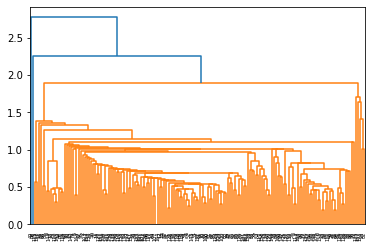

In [36]:
mergings_single = linkage(df1, method="single", metric='euclidean')
dendrogram(mergings_single)
plt.show()

No Good results.
clusters are not forming using single linkage so we will be using complete linkage for further processing.

### Complete Linkage

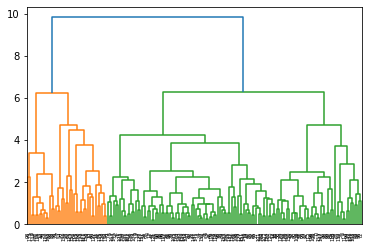

In [37]:
mergings_complete = linkage(df1, method="complete", metric='euclidean')
dendrogram(mergings_complete)
plt.show()

looking at this we can say that there are 3 clusters forming with heirarichal clustering.

In [38]:
cluster_labels = cut_tree(mergings_complete, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 1, 2, 1, 0, 1, 1, 0,
       0, 2, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       2, 2, 0, 0, 2, 2, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 0, 1, 1,
       0, 2, 2, 2, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0])

In [39]:
df_hm = pd.concat([data, pd.Series(cluster_labels)], axis = 1)
df_hm.columns = ['country','child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp','cluster_labels']
df_hm.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
0,Afghanistan,90.2,70.4688,41.9174,248.297,1610.0,9.44,56.2,5.820,553.0,0
1,Albania,16.6,1145.2000,267.8950,1987.740,9930.0,4.49,76.3,1.650,4090.0,1
2,Algeria,27.3,1712.6400,185.9820,1400.440,12900.0,16.10,76.5,2.890,4460.0,1
3,Angola,116.0,2199.1900,100.6050,1514.370,5900.0,20.87,60.1,5.861,3530.0,0
4,Antigua and Barbuda,10.3,5551.0000,735.6600,7185.800,19100.0,1.44,76.8,2.130,12200.0,1


In [40]:
df_hm['cluster_labels'].value_counts()

1    84
0    43
2    40
Name: cluster_labels, dtype: int64

### Heirarichal Clusters Visulaisation

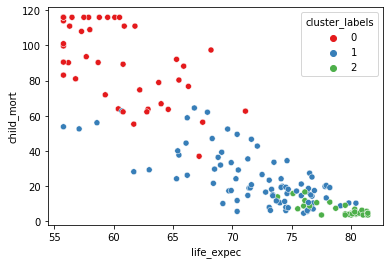

In [41]:
# life_expec
sns.scatterplot(x = 'life_expec', y = 'child_mort', hue ='cluster_labels', legend = 'full', data = df_hm, palette='Set1')
plt.show()

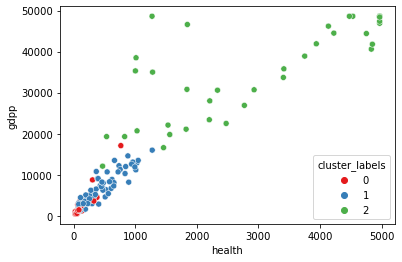

In [42]:
#health
sns.scatterplot(x = 'health', y = 'gdpp', hue ='cluster_labels', legend = 'full', data = df_hm, palette='Set1')
plt.show()

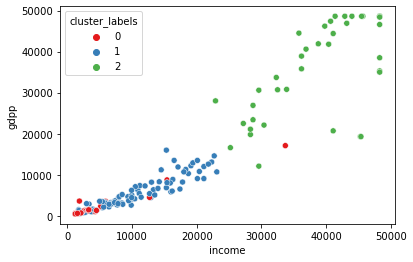

In [43]:
#income
sns.scatterplot(x = 'income', y = 'gdpp', hue ='cluster_labels', legend = 'full', data = df_hm, palette='Set1')
plt.show()

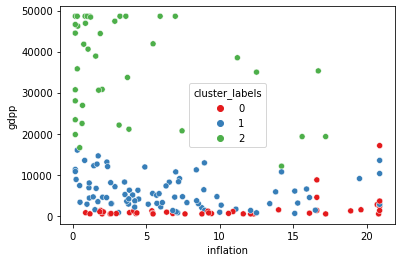

In [44]:
#inflation
sns.scatterplot(x = 'inflation', y = 'gdpp', hue ='cluster_labels', legend = 'full', data = df_hm, palette='Set1')
plt.show()

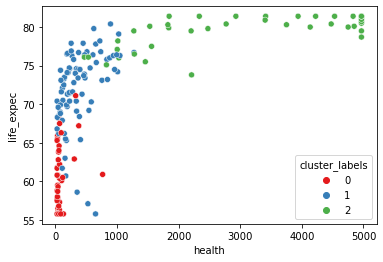

In [45]:
# health vs life_expec
sns.scatterplot(x = 'health', y = 'life_expec', hue ='cluster_labels', legend = 'full', data = df_hm, palette='Set1')
plt.show()

### Cluster Profiling


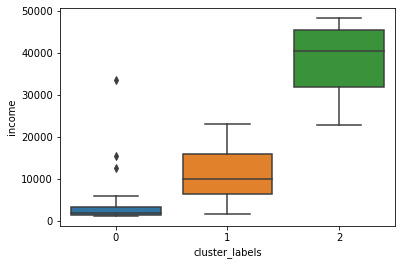

In [46]:
# income
sns.boxplot(data=df_hm,x = 'cluster_labels',y='income')
plt.show()

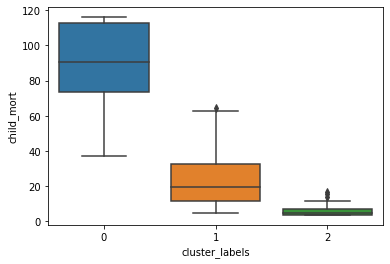

In [47]:
#child_mort
sns.boxplot(data=df_hm,x = 'cluster_labels',y='child_mort')
plt.show()

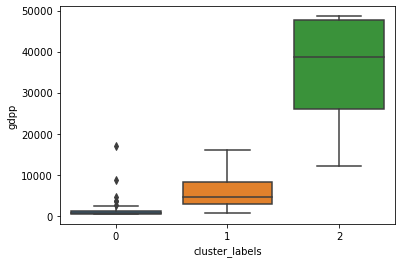

In [48]:
#gdpp
sns.boxplot(data=df_hm,x = 'cluster_labels',y='gdpp')
plt.show()

Here we can cluster_id 0 is having very lowe gdpp and income with a very high child_mort rate so this will be our focus of help.

In [49]:
#Finding the observations that belong to cluster id 0
df_hm[df_hm['cluster_labels']==0]['country']

0                   Afghanistan
3                        Angola
17                        Benin
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
50                      Eritrea
55                        Gabon
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
72                         Iraq
80                        Kenya
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
106                  Mozambique
112                       Niger
113     

In [50]:
top_h = df_hm[df_hm['cluster_labels']==0].sort_values(by=["child_mort","gdpp","income"], ascending=[False, True,True]) 
top_h = top_h.reset_index().drop('index',1)
top_h.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
0,Central African Republic,116.0,70.4688,26.71592,169.281,1213.0,2.01,55.78,5.210,465.9,0
1,"Congo, Dem. Rep.",116.0,137.2740,26.71592,169.281,1213.0,20.80,57.50,5.861,465.9,0
2,Niger,116.0,77.2560,26.71592,170.868,1213.0,2.55,58.80,5.861,465.9,0
3,Sierra Leone,116.0,70.4688,52.26900,169.281,1220.0,17.20,55.78,5.200,465.9,0
4,Burkina Faso,116.0,110.4000,38.75500,170.200,1430.0,6.81,57.90,5.861,575.0,0
5,Haiti,116.0,101.2860,45.74420,428.314,1500.0,5.45,55.78,3.330,662.0,0
6,Mali,116.0,161.4240,35.25840,248.508,1870.0,4.37,59.50,5.861,708.0,0
7,Chad,116.0,330.0960,40.63410,390.195,1930.0,6.39,56.50,5.861,897.0,0
8,Nigeria,116.0,589.4900,118.13100,405.420,5150.0,20.87,60.50,5.840,2330.0,0
9,Angola,116.0,2199.1900,100.60500,1514.370,5900.0,20.87,60.10,5.861,3530.0,0


#### Top 10 Countries obtained from Hierarchical clustering.

In [51]:
top_10 = top_h.iloc[:10]
top_10['country'].reset_index().drop('index',axis=1)

,country
0,Central African Republic
1,"Congo, Dem. Rep."
2,Niger
3,Sierra Leone
4,Burkina Faso
5,Haiti
6,Mali
7,Chad
8,Nigeria
9,Angola


### Recommendations

##### KMeans clustering

    1) Cluster with ClusterID as 2, is the cluster of most backward country.

    2) Countries on which we require to focus more are:
        0	Central African Republic
        1	Congo, Dem. Rep.
        2	Niger
        3	Sierra Leone
        4	Burkina Faso
        5	Haiti
        6	Mali
        7	Chad
        8	Nigeria
        9	Angola


##### Heirarichal Clustering

    1) Cluster with ClusterID as 0, is the cluster of most backward country.

    2) Countries on which we require to focus more are:
        0	Central African Republic
        1	Congo, Dem. Rep.
        2	Niger
        3	Sierra Leone
        4	Burkina Faso
        5	Haiti
        6	Mali
        7	Chad
        8	Nigeria
        9	Angola
